In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.animation as animation
from matplotlib import ticker
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from matplotlib.animation import FuncAnimation,PillowWriter

In [2]:
columns = [str(year) for year in range(2010, 2022)]
rows = ['World Population (Billion)', 'Divorce Rate (% per 1000 couples)','Population Change(%)','Rate of Rate of Change']
df = pd.DataFrame(index=rows, columns=columns)

pop_data = [6.99,7.07,7.16,7.25,7.34,7.43,7.51,7.60,7.68,7.76,7.84,7.91]
div_data = [9.5,9.5,9.7,9.9,10.4,10.1,9.9,9.7,9.2,8.9,8.6,7.8]
pop_change_rate = [1.27,1.25,1.24,1.24,1.22,1.19,1.17,1.15,1.10,1.06,0.98,0.87]
change_of_change_rate =[0.02,0.02,0.01,0.01,0.02,0.03,0.02,0.02,0.05,0.04,0.08,0.11]

for i in range(len(df.iloc[0])):
    df.iloc[0,i] = pop_data[i]
    df.iloc[1,i] = div_data[i]
    df.iloc[2,i] = pop_change_rate[i]
    df.iloc[3,i] = change_of_change_rate[i]
print('Divorce rate net change (on average) =',df.loc['Divorce Rate (% per 1000 couples)'].mean())
df

Divorce rate net change (on average) = 9.433333333333334


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
World Population (Billion),6.99,7.07,7.16,7.25,7.34,7.43,7.51,7.6,7.68,7.76,7.84,7.91
Divorce Rate (% per 1000 couples),9.5,9.5,9.7,9.9,10.4,10.1,9.9,9.7,9.2,8.9,8.6,7.8
Population Change(%),1.27,1.25,1.24,1.24,1.22,1.19,1.17,1.15,1.1,1.06,0.98,0.87
Rate of Rate of Change,0.02,0.02,0.01,0.01,0.02,0.03,0.02,0.02,0.05,0.04,0.08,0.11


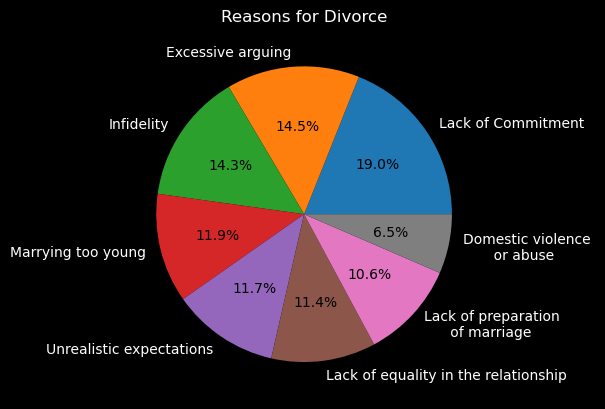

In [3]:
Reasons = ['Lack of Commitment','Excessive arguing','Infidelity','Marrying too young', 'Unrealistic expectations', 'Lack of equality in the relationship','Lack of preparation \n      of marriage','Domestic violence \n       or abuse']
values = [73,56,55,46,45,44,41,25]

# Create a pie chart
pie = plt.pie(values, labels=Reasons, autopct='%1.1f%%')

# Set the background color
fig = plt.gcf()
fig.patch.set_facecolor('black')

# Set the text color for pie chart labels
for text in pie[1]:
    text.set_color('white')

# Set the title color
plt.title('Reasons for Divorce', color='white')

# Save the chart as an image file with black background
plt.savefig('pie_chart_reasons.png', facecolor='black')

# Display the chart
plt.show()

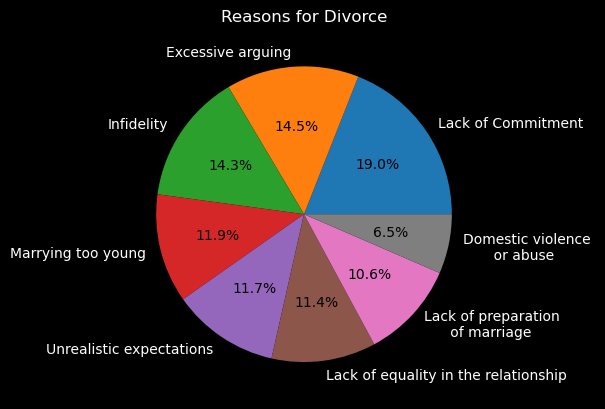

In [4]:
Percentages = [19.0, 14.5, 14.3, 11.9, 11.7, 11.4, 10.6, 6.5]  # Make sure the values sum up to 100 or the desired total

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color
fig.patch.set_facecolor('black')

# Initialize the pie chart with the actual percentages
pie = ax.pie(Percentages, labels=Reasons, autopct='%1.1f%%')

# Set the text color
for text in pie[1]:
    text.set_color('white')

# Add a title
ax.set_title('Reasons for Divorce', color='white')

# Update function to animate the pie chart
def update(frame):
    # Clear previous patches
    for patch in pie[0]:
        patch.set_visible(False)

    # Update the pie chart data
    for i in range(frame + 1):
        pie[0][i].set_visible(True)

    return tuple(pie[0])

# Create the animation
animation = FuncAnimation(fig, update, frames=len(Percentages), interval=500, blit=True)

# Save the animation as a GIF file
animation.save('pie_chart_animation_reasons.gif', writer=PillowWriter(fps=2))

# Display the animation
plt.show()


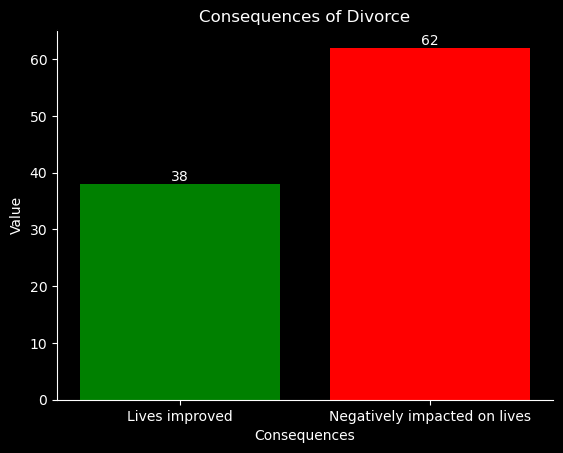

In [5]:
Consequences = ['Lives improved', 'Negatively impacted on lives']
value = [38, 62]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color for the chart area and figure
ax.set_facecolor('black')
fig.set_facecolor('black')

# Create the bar chart with custom colors
bars = ax.bar(Consequences, value, color=['green', 'red'])

# Add labels and a title with white text color
ax.set_xlabel('Consequences', color='white')
ax.set_ylabel('Value', color='white')
ax.set_title('Consequences of Divorce', color='white')

# Set the text color to white for text annotations above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', color='white')

# Set the color of the graph line
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Set the color of the text outside the chart
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Save the chart as an image file with black background
plt.savefig('bar_chart_consequences.png', facecolor='black')

# Display the bar chart
plt.show()


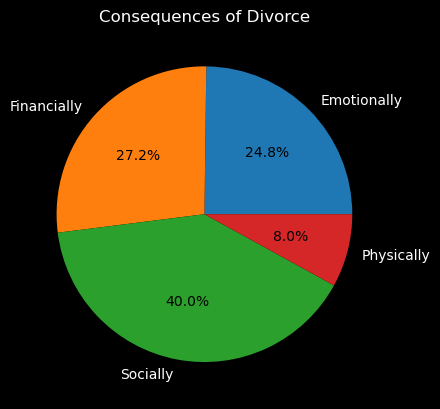

In [6]:
consequences = ['Emotionally', 'Financially', 'Socially', 'Physically']
Cvalue = [62, 68, 100, 20]

# Create a pie chart
pie = plt.pie(Cvalue, labels=consequences, autopct='%1.1f%%')

# Set the background color
fig = plt.gcf()
fig.patch.set_facecolor('black')

# Set the text color for pie chart labels
for text in pie[1]:
    text.set_color('white')

# Set the title color
plt.title('Consequences of Divorce', color='white')

# Save the chart as an image file with black background
plt.savefig('pie_chart_consequences.png', facecolor='black')

# Display the chart
plt.show()


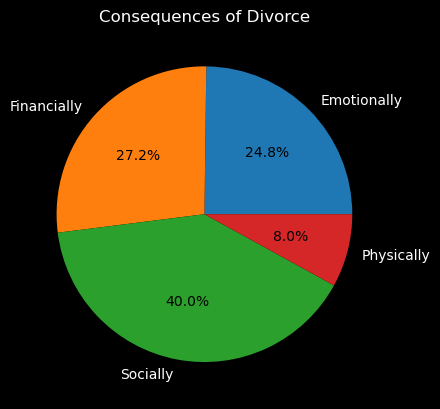

In [7]:
# Define the data for the bar chart
Cpercentages = [24.8, 27.2, 40.0, 8.0]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color
fig.patch.set_facecolor('black')

# Initialize the pie chart with the actual percentages
pie = ax.pie(Cpercentages, labels=consequences, autopct='%1.1f%%')

# Set the text color
for text in pie[1]:
    text.set_color('white')

# Add a title
ax.set_title('Consequences of Divorce',color = 'white')

# Update function to animate the pie chart
def update(frame):
    # Clear previous patches
    for patch in pie[0]:
        patch.set_visible(False)

    # Update the pie chart data
    for i in range(frame + 1):
        pie[0][i].set_visible(True)

    return tuple(pie[0])

# Create the animation
animation = FuncAnimation(fig, update, frames=len(Cpercentages), interval=500, blit=True)

# Save the animation as a GIF file
animation.save('pie_chart_animation_Consequences.gif', writer=PillowWriter(fps=2))

# Display the animation
plt.show()

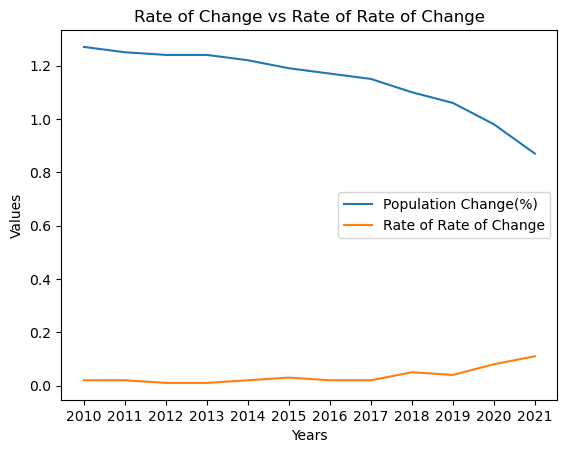

In [8]:
years = df.columns
population = df.loc['Population Change(%)']
divorce_rate = df.loc['Rate of Rate of Change']

plt.plot(years, population, label='Population Change(%)')
plt.plot(years, divorce_rate, label='Rate of Rate of Change')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Rate of Change vs Rate of Rate of Change')

plt.legend()

plt.show()

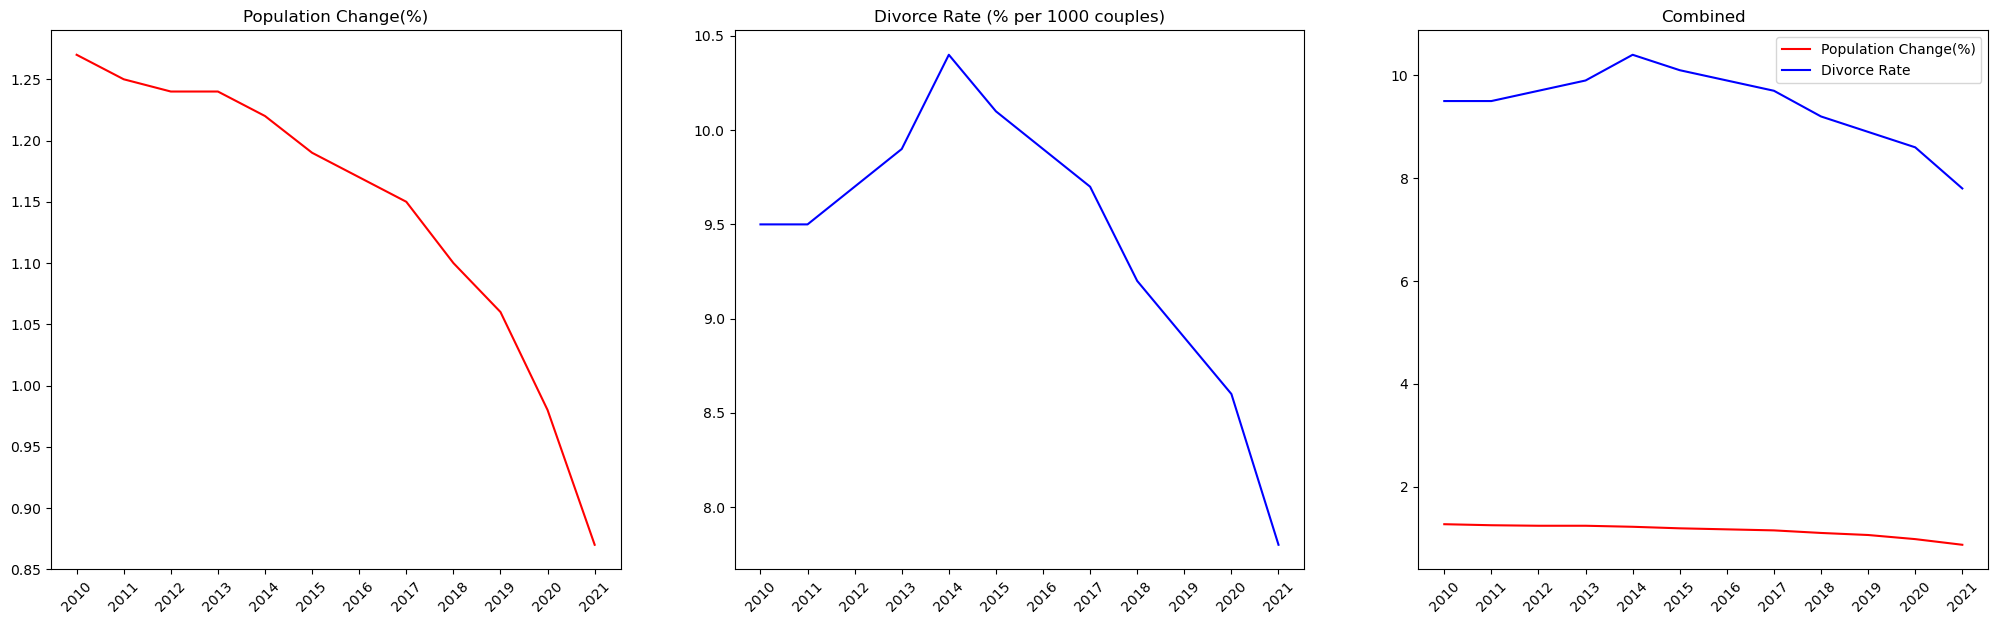

In [9]:
# Data
population = df.loc['Population Change(%)']
divorce_rate = df.loc['Divorce Rate (% per 1000 couples)']

# Generate x-axis values
x = np.arange(len(population))

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

# Plot the first graph (Population Change)
ax1.plot(x, population, color='red')
ax1.set_xticks(x)
ax1.set_xticklabels(population.index, rotation=45)
ax1.set_title('Population Change(%)')

# Plot the second graph (Divorce Rate)
ax2.plot(x, divorce_rate, color='blue')
ax2.set_xticks(x)
ax2.set_xticklabels(divorce_rate.index, rotation=45)
ax2.set_title('Divorce Rate (% per 1000 couples)')

# Plot the third graph (Combined)
ax3.plot(x, population, color='red', label='Population Change(%)')
ax3.plot(x, divorce_rate, color='blue', label='Divorce Rate')
ax3.set_xticks(x)
ax3.set_xticklabels(population.index, rotation=45)
ax3.set_title('Combined')
ax3.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Display the plot
plt.show()

In [10]:
population = pd.to_numeric(df.loc['Rate of Rate of Change'], errors='coerce')
divorce_rate = pd.to_numeric(df.loc['Divorce Rate (% per 1000 couples)'], errors='coerce')
correlation = population.corr(divorce_rate)
print('correlation =',correlation,'as they are negatively correlated it implies that as divorce rate increases, population growth rate would be decreasing.')

correlation = -0.891670860282494 as they are negatively correlated it implies that as divorce rate increases, population growth rate would be decreasing.


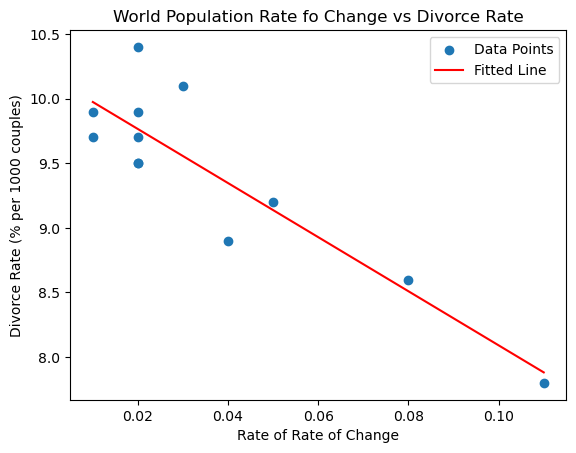

In [11]:
population = df.loc['Rate of Rate of Change'].astype(float)
divorce_rate = df.loc['Divorce Rate (% per 1000 couples)'].astype(float)

coefficients = np.polyfit(population, divorce_rate, 1)
poly = np.poly1d(coefficients)
x = np.linspace(min(population), max(population), 100)
y = poly(x)

plt.scatter(population, divorce_rate, label='Data Points')
plt.plot(x, y, color='red', label='Fitted Line')

plt.xlabel('Rate of Rate of Change')
plt.ylabel('Divorce Rate (% per 1000 couples)')
plt.title('World Population Rate fo Change vs Divorce Rate')

plt.legend()

plt.show()

In [12]:
# Prepare the data
X = df.iloc[1:2, :].T  # Independent variable (Divorce Rate)
y = df.iloc[0, :]  # Dependent variable (World Population)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse,"\nAs the Mean Squared Error (mse) value is very low we can say that model\'s performance is very good and the predictions are closer to the true values.")
print("R square score:", r2,"\nThis suggests that the divorce rate alone can account for about 37.41% of the differences we observe in the world population.\nThis means that changes in the divorce rate can explain some of the variations in population size.")

Mean Squared Error: 0.09192238287539722 
As the Mean Squared Error (mse) value is very low we can say that model's performance is very good and the predictions are closer to the true values.
R square score: 0.37410996680392206 
This suggests that the divorce rate alone can account for about 37.41% of the differences we observe in the world population.
This means that changes in the divorce rate can explain some of the variations in population size.


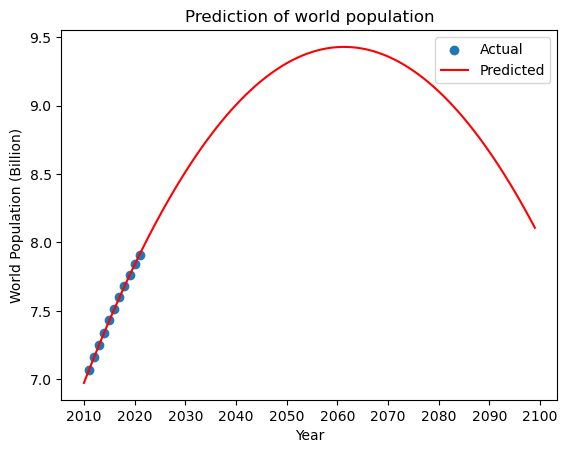

In [13]:
# Prepare the data
X = np.array(df.columns[1:]).astype(int).reshape(-1, 1)  # Time (years)
y = df.iloc[0, 1:].values  # World Population

# Fit a polynomial regression model
degree = 2  # Adjust the degree as desired
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions for available years
X_pred = np.arange(2010, 2100).reshape(-1, 1)  # Predict from 2010 to 2030
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Plot the results
plt.scatter(X, y, label='Actual')
plt.plot(X_pred.astype(int), y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('World Population (Billion)')
plt.title('Prediction of world population')

# Format x-axis ticks as integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend()
plt.show()

$\bold{Hypothesis:}$ The divorce rate has an impact on the world population. \
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ Specifically, an increase in the divorce rate will lead to changes in the world population.

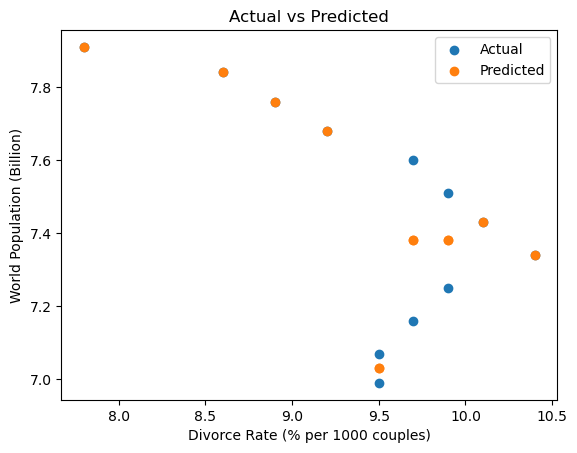

In [14]:
# Prepare the data
divorce_rate = df.loc['Divorce Rate (% per 1000 couples)'].values.reshape(-1, 1)
world_pop = df.loc['World Population (Billion)'].values

# Train the model
model = DecisionTreeRegressor()
model.fit(divorce_rate, world_pop)

# Predict on the same data
predicted_change = model.predict(divorce_rate)

# Plot the results
plt.scatter(divorce_rate, world_pop, label='Actual')
plt.scatter(divorce_rate, predicted_change, label='Predicted')
plt.xlabel('Divorce Rate (% per 1000 couples)')
plt.ylabel('World Population (Billion)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


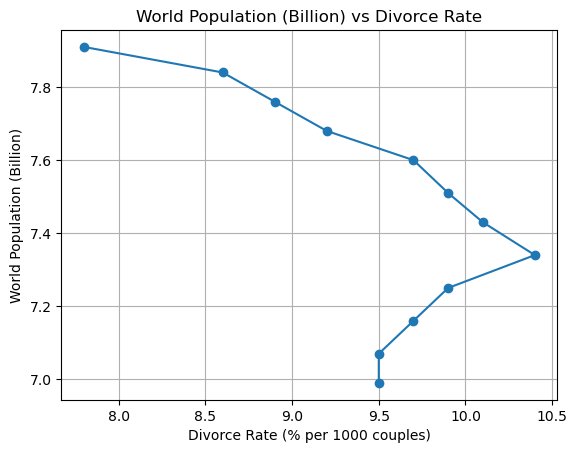

In [15]:
divorce_rate = df.loc['Divorce Rate (% per 1000 couples)'].values
world_pop = df.loc['World Population (Billion)'].values

plt.plot(divorce_rate, world_pop, marker='o')
plt.xlabel('Divorce Rate (% per 1000 couples)')
plt.ylabel('World Population (Billion)')
plt.title('World Population (Billion) vs Divorce Rate')
plt.grid(True)
plt.show()


In [16]:
# Calculate mean squared error
mse = mean_squared_error(world_pop, predicted_change)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(world_pop, predicted_change)
print("R-squared Score:", r2)

feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)

Mean Squared Error: 0.011149999999999978
R-squared Score: 0.8700676528663454
Feature Importance: [1.]


A feature importance score of [1.] indicates that the single feature used in the model, which is the divorce rate (% per 1000 couples), is the only important feature in predicting the target variable (World Population). In other words, the divorce rate feature has a significant impact on determining the population change according to the decision tree model.

Obtaining a feature importance score of 1.0 indicates that the divorce rate feature is the most important factor for predicting population change according to the decision tree model.

In [17]:
# # Convert world_pop to numeric type
# world_pop = world_pop.astype(float)

# # Define the threshold for population change
# threshold = df.loc['Divorce Rate (% per 1000 couples)'].mean()  # Adjust the threshold as needed

# # Convert population change into binary labels
# labels = label_binarize(world_pop, classes=[0, threshold, 1])
# labels = labels[:, 1]  # Select the positive class (population increase)

# # Train the classification model
# model = DecisionTreeClassifier()
# model.fit(divorce_rate, labels)

# # Predict on the same data
# predicted_labels = model.predict(divorce_rate)
# predicted_probabilities = model.predict_proba(divorce_rate)[:, 1]  # Predict probabilities for the positive class

# # Calculate the AUC ROC score
# auc_roc = roc_auc_score(labels, predicted_probabilities)
# print("AUC ROC:", auc_roc)


AUC ROC is impossible to calculate in my project since it is more appropriate for binary classification problems, whereas my hypothesis involved regression and predicting continuous population change.

The above code would give error at any cost due to the limitation of AUC ROC. You can try uncomment it and run the code.

In [18]:
# Set the threshold for the divorce rate
threshold = df.loc['Divorce Rate (% per 1000 couples)'].mean()

# Create a new column "Divorce Rate Class" in the DataFrame
df.loc['Divorce Rate Class'] = (df.loc['Divorce Rate (% per 1000 couples)'] > threshold).astype(int)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
World Population (Billion),6.99,7.07,7.16,7.25,7.34,7.43,7.51,7.6,7.68,7.76,7.84,7.91
Divorce Rate (% per 1000 couples),9.5,9.5,9.7,9.9,10.4,10.1,9.9,9.7,9.2,8.9,8.6,7.8
Population Change(%),1.27,1.25,1.24,1.24,1.22,1.19,1.17,1.15,1.1,1.06,0.98,0.87
Rate of Rate of Change,0.02,0.02,0.01,0.01,0.02,0.03,0.02,0.02,0.05,0.04,0.08,0.11
Divorce Rate Class,1,1,1,1,1,1,1,1,0,0,0,0


In [19]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the string labels into numerical values
y_encoded = label_encoder.fit_transform(df.loc['Divorce Rate Class'][1:])

# Transpose the dataframe and exclude the year 2021
df_transposed = df.iloc[:, :-1].T

# Select the features (X) and the target variable (y)
X = df_transposed[['World Population (Billion)', 'Population Change(%)', 'Rate of Rate of Change']]
y = y_encoded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode the numerical predictions back to original labels if needed
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


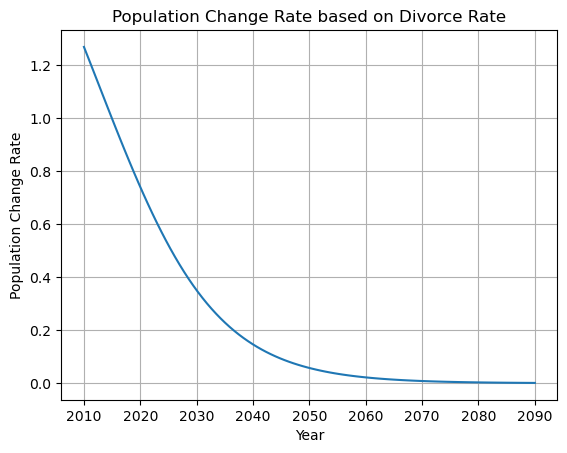

In [20]:
def logistic_equation(t, y, r, K, D):
    P = y[0]
    dP_dt = r * P * (1- P / K) * (-D)
    return [dP_dt]

t_start = 2010
t_end = 2090

P0 = 1.27  
D = 9.43333 

r = 0.01034 
K = 2.24

t_points = np.linspace(t_start, t_end, num=100)

solution = solve_ivp(logistic_equation, [t_start, t_end], [P0], args=(r, K, D), t_eval=t_points)

population = solution.y[0]

plt.plot(t_points, population)
plt.xlabel('Year')
plt.ylabel('Population Change Rate')
plt.title('Population Change Rate based on Divorce Rate')
plt.grid(True)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


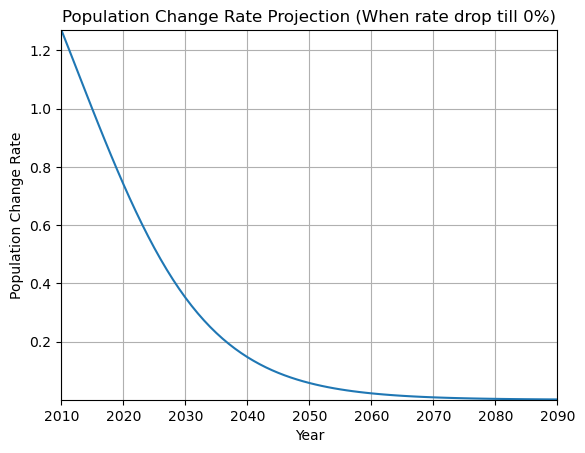

In [21]:
import matplotlib.animation as animation #sometimes it doesn't defined after running in the first code

fig, ax = plt.subplots()
line, = ax.plot(t_points, population)
ax.set_xlim(t_start, t_end)
ax.set_ylim(min(population), max(population))
ax.set_xlabel('Year')
ax.set_ylabel('Population Change Rate')
ax.set_title('Population Change Rate Projection (When rate drop till 0%)')

def update(frame):
    if frame == 0:
        return line,
    t_new = np.linspace(t_start, t_start + frame, num=100)
    solution = solve_ivp(logistic_equation, [t_start, t_start + frame], [P0], args=(r, K, D), t_eval=t_new)
    population_new = solution.y[0]
    line.set_data(t_new, population_new)
    ax.set_ylim(min(population_new), max(population_new))
    return line,

num_frames = len(t_points)
ani1 = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=True)



# Save the animation as a GIF file
ani1.save('population_animation.gif', writer='imagemagick')

plt.grid(True)
plt.show()

Human will go into extinction at year 12087, which is 10090 years from now.


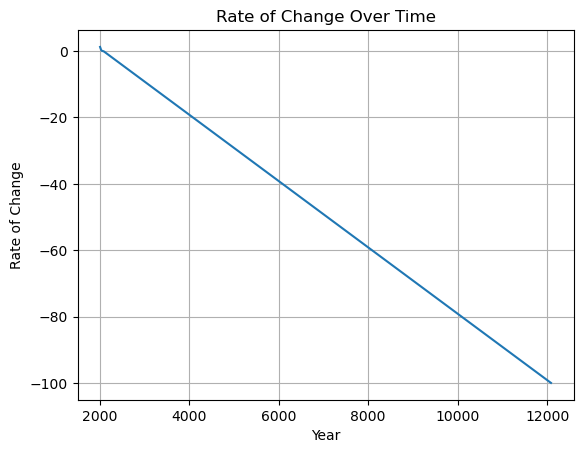

In [22]:
population_data = []

for pop in range(0,2086-2010):
    population_data.append(population[pop])

count = 0
year = 2091
pop_change = []
pop_change_val = None
x = 0
while x - 0.01 < 100:
    if count != 4:
        pop_change_val = -x
        count = count + 1
    else:
        pop_change_val = -(x - 0.01)
        count = 0
    pop_change.append(round(pop_change_val, 2))
    x = x + 0.01
    year = year + 1

rate_of_change = population_data + pop_change
years = list(range(2010, 2010 + len(rate_of_change)))
print(f'Human will go into extinction at year {2010 + len(rate_of_change)}, which is {13 + len(rate_of_change)} years from now.')
plt.plot(years, rate_of_change)
plt.xlabel('Year')
plt.ylabel('Rate of Change')
plt.title('Rate of Change Over Time')
plt.grid(True)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


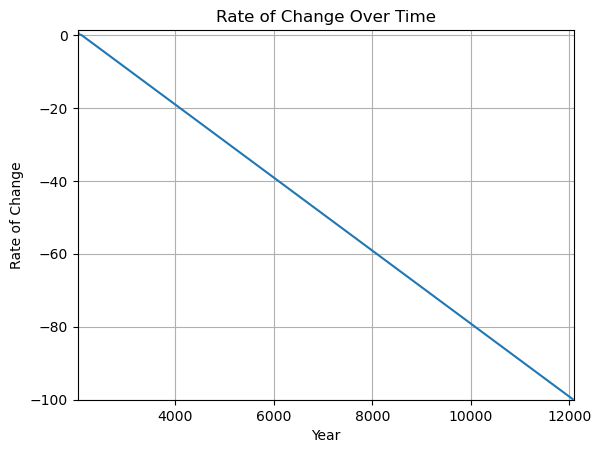

In [23]:
import matplotlib.animation as animation #sometimes it doesn't defined after running in the first code

fig, ax = plt.subplots()
ax.set_xlim(2010, 2010 + len(rate_of_change))
ax.set_ylim(-100, 1.3)
ax.set_xlabel('Year')
ax.set_ylabel('Rate of Change')
ax.set_title('Rate of Change Over Time')

line, = ax.plot([], [])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = years[:i*10]  # Skip every 10th frame
    y = rate_of_change[:i*10]  # Skip every 10th frame
    line.set_data(x, y)
    return line,

num_frames = len(years) // 10  # Reduce the number of frames by 10
total_duration = 30  # Desired duration in seconds
interval = int((total_duration * 1000) / num_frames)  # Calculate interval to achieve desired duration

ani2 = animation.FuncAnimation(fig, animate, frames=num_frames, interval=interval, init_func=init, blit=True)

plt.grid(True)

# Save the animation as a GIF file
ani2.save('rate_of_change_graph.gif', writer='imagemagick')

plt.show()

In [24]:
no_of_year_before_human_extinct = 10090
avg_human_life_span = 72.98
times_of_rebirth = round(no_of_year_before_human_extinct/avg_human_life_span)
print(f'Even if you die and reborn for {times_of_rebirth} times, human wouldn\'t be extinct just yet')

Even if you die and reborn for 138 times, human wouldn't be extinct just yet
